In [1]:
#Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Load the customer_value_analysis.csv into the variable customer_df.

In [2]:

customers = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


First look at its main features (head, shape, info)

In [3]:

customers.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
customers.shape

(9134, 24)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

--------------
Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [6]:
customers.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

----------
Change effective to date column to datetime format.

In [8]:
customers['effective_to_date'] = pd.to_datetime(customers['effective_to_date'])
customers['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

----------
Check NaN values per column.

In [9]:


print(customers.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


 Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.


In [11]:
def separate_cols (cus):
    num_cols = cus.select_dtypes(include=['float64','int64']).columns
    cat_cols = cus.select_dtypes(exclude=['float64','int64']).columns
    return cus[num_cols], cus[cat_cols]

In [12]:
num_cols, cat_cols = separate_cols(customers)

print(num_cols.info())
print(cat_cols.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer       

In [13]:
#Drop any ID column

In [16]:
customers2 = customers.copy()

In [17]:
def drop_id_col(customers2, id_col_name):
    if id_col_name in customers2.columns:
        customers2 = customers2.drop(id_col_name, axis=1)
    return customers2

customers2 = drop_id_col(customers2, 'customer')

In [18]:
customers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [19]:
customers2.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [20]:
customers.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [22]:
corr_matrix = num_cols.corr()

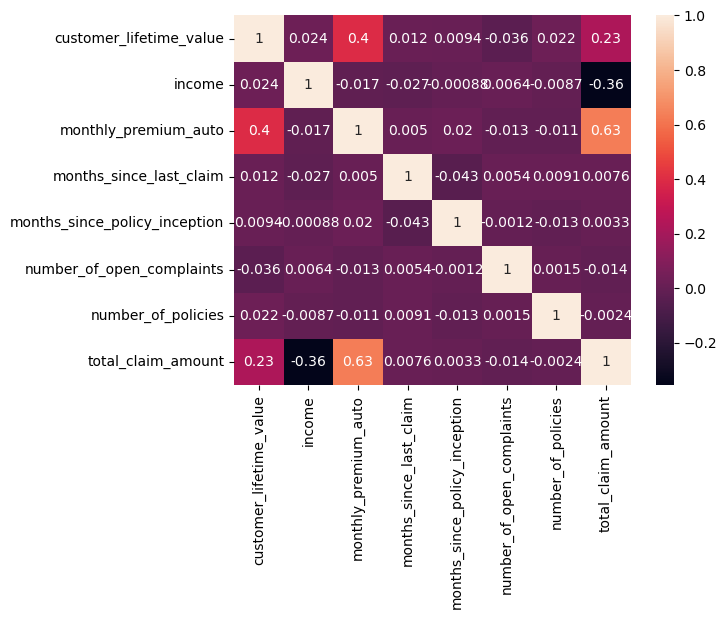

In [27]:
sns.heatmap(corr_matrix, annot =True)
plt.show()

In [24]:
max_correlation = corr_matrix.abs().unstack().sort_values(ascending =False).drop_duplicates()

In [29]:
# The highest pair of numerical variables will be the first entry in the sorted values.
print(max_correlation.head(1))

customer_lifetime_value  customer_lifetime_value    1.0
dtype: float64


It makes sense, why? I cannot anwser this question, kindly let me know when you check my labs. Thanks so much. 

---------------------
Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [33]:
def split_continuous_discrete(df, threshold=36):
    continuous_cols = []
    discrete_cols = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() > threshold:
                continuous_cols.append(col)
            else: 
                discrete_cols.append(col)
    return df[continuous_cols],df[discrete_cols]
continuous_df, discrete_df = split_continuous_discrete(num_cols)


In [34]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_policy_inception  9134 non-null   int64  
 4   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 356.9 KB


In [35]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   months_since_last_claim    9134 non-null   int64
 1   number_of_open_complaints  9134 non-null   int64
 2   number_of_policies         9134 non-null   int64
dtypes: int64(3)
memory usage: 214.2 KB


--------------
Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

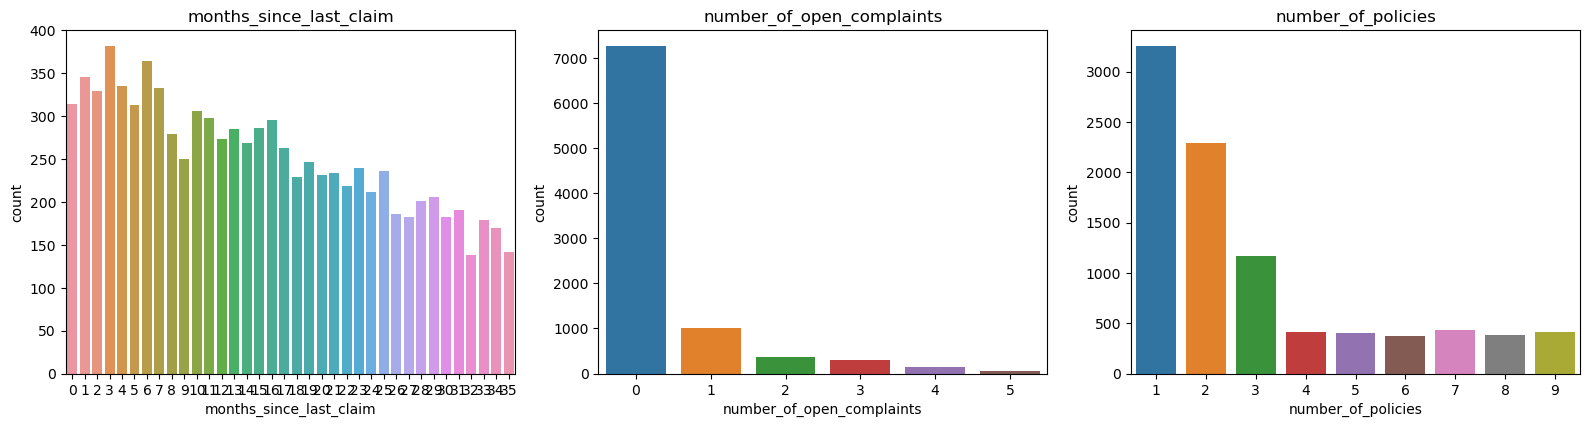

In [58]:
def plot_discrete_cols (df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate (df.columns):
        plt.subplot(4,3,i+1)
        sns.countplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
plot_discrete_cols(discrete_df)

-------------------
Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

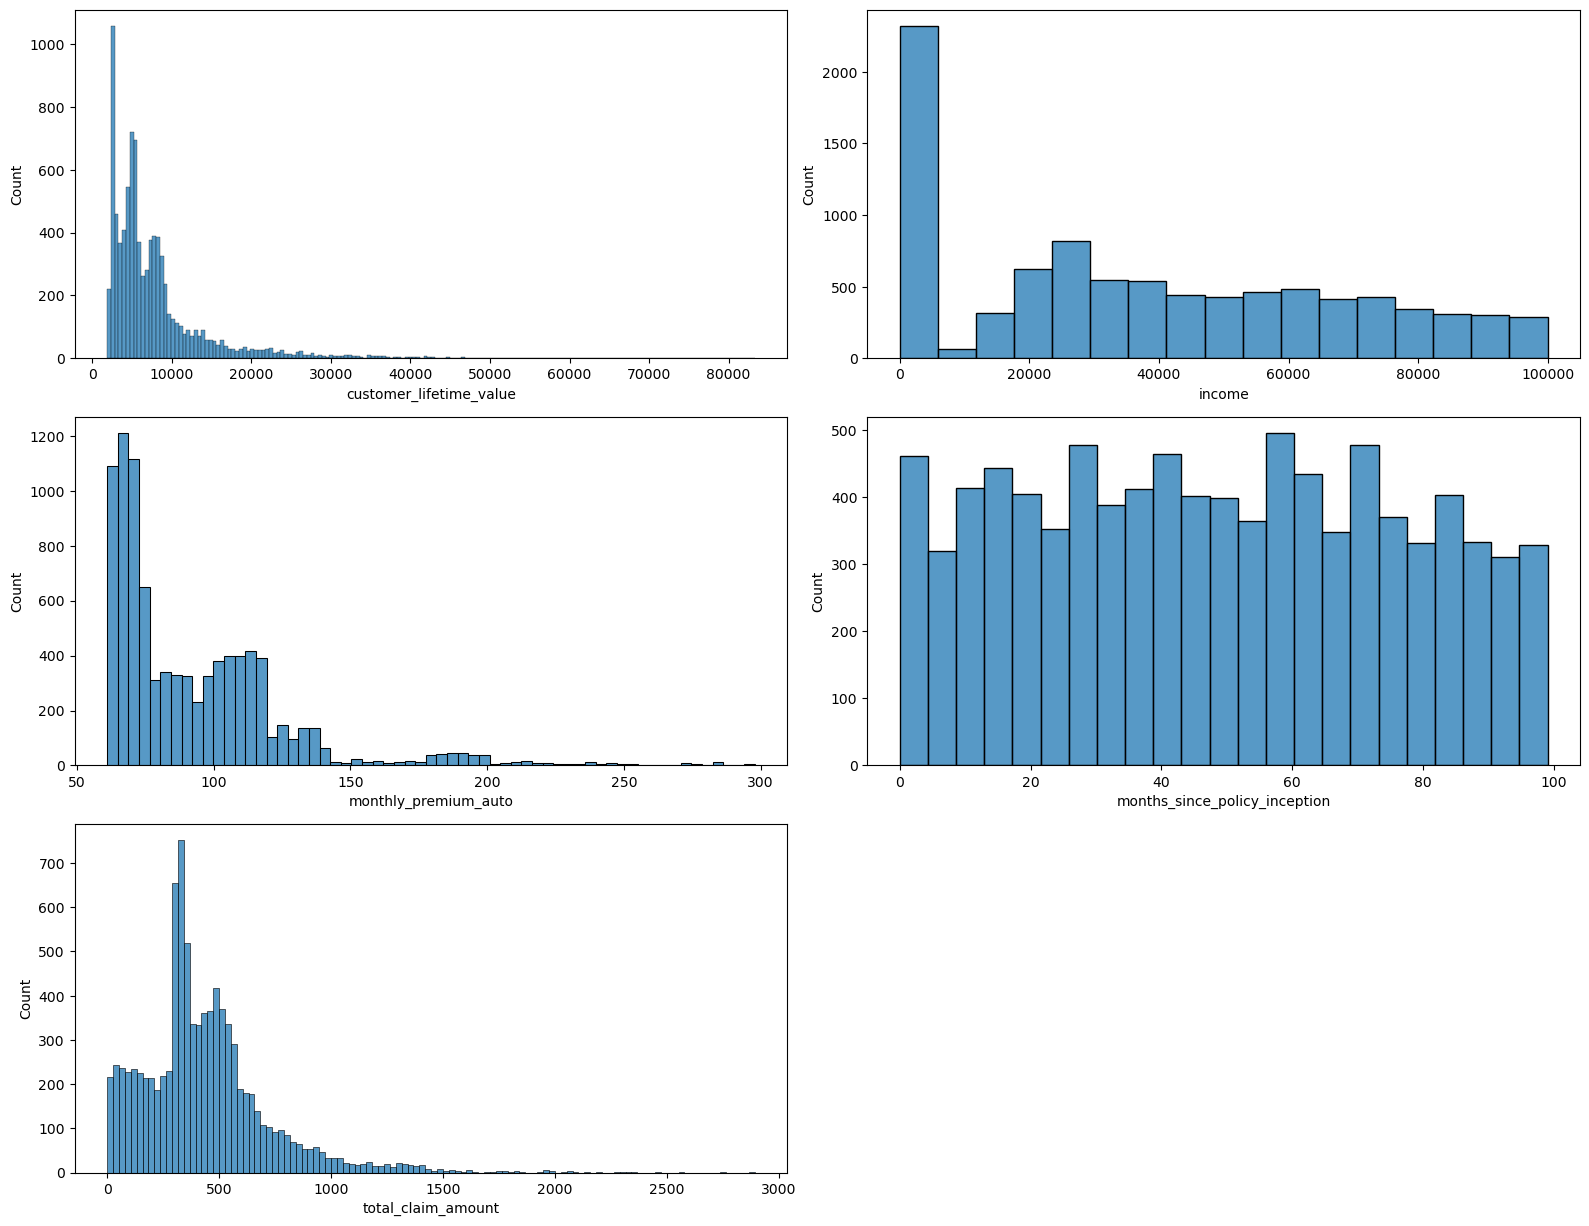

In [57]:
def plot_continuous_cols(df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate(df.columns):
        plt.subplot(4,2,i+1)
        sns.histplot(df[col])
        plt.tight_layout()
#         plt.show()
plot_continuous_cols(continuous_df)

------------
According to the previous histogram plots, do you think that you do will have to apply any transformation?

---------------
Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


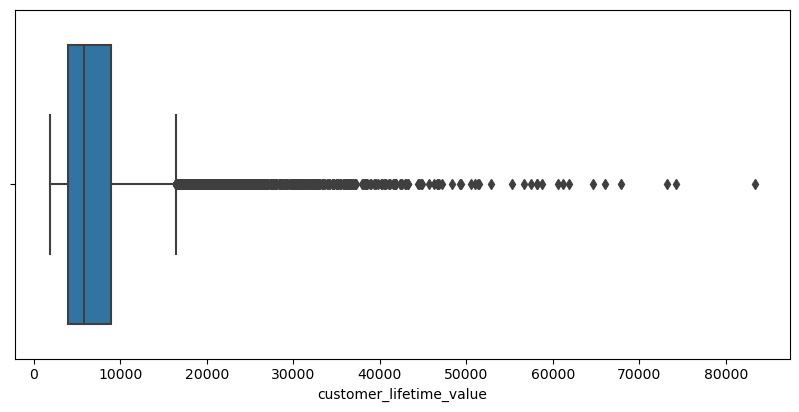

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


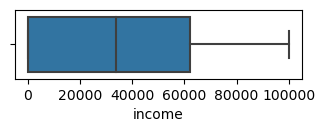

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


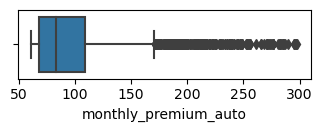

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


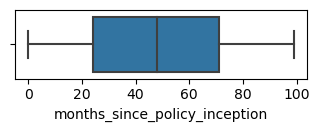

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


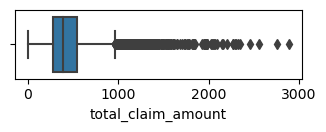

In [59]:
def plot_boxplots(df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate(df.columns):
        plt.subplot(4,2,i+1)
        sns.boxplot(df[col])
        plt.tight_layout()
        plt.show()
plot_boxplots(continuous_df)